# Battle of the Neighborhoods Pt 2

#### Import python libraries

In [1]:
import pandas as pd
from bs4 import BeautifulSoup
import requests
import numpy as np
import io
import datetime
from datetime import datetime 

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

#### Import postal code per suburb with demographic age data for target group

In [2]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_7a7ee02453e04e5aa30e3bdfd5e08248 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='4lPDXOtD2MK8I23X3jRvwbMVZBK5vRlbeIYgKZRYsu-1',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_7a7ee02453e04e5aa30e3bdfd5e08248.get_object(Bucket='ibmdatasciencecapstone-donotdelete-pr-v7jsqscglu8xtq',Key='BE_new.xlsx')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_excel(io.BytesIO(body.read()))  
df.head()

,Country,PostalCode,Suburb,Region,RegionCode,Province,ProvinceCode,City,Occurrences,Latitude,Longitude,Over 64
0,BE,3500,Hasselt,Vlaanderen,VLG,Limbourg,VLI,Hasselt,71,50.9311,5.3378,17817
1,BE,3600,Genk,Vlaanderen,VLG,Limbourg,VLI,Hasselt,71,50.0965,5.5008,12956
2,BE,3800,Sint-Truiden,Vlaanderen,VLG,Limbourg,VLI,Hasselt,71,50.8168,5.1865,9276
3,BE,3580,Beringen,Vlaanderen,VLG,Limbourg,VLI,Hasselt,71,51.0495,5.2261,8543
4,BE,3630,Maasmechelen,Vlaanderen,VLG,Limbourg,VLI,Tongeren,73,50.9655,5.6945,7258


In [3]:
df2 = df.groupby(["PostalCode", "City"])["Suburb"].apply(",".join).reset_index()
df2.head()

,PostalCode,City,Suburb
0,3500,Hasselt,Hasselt
1,3530,Maaseik,Houthalen-Helchteren
2,3550,Hasselt,Heusden-Zolder
3,3580,Hasselt,Beringen
4,3600,Hasselt,Genk


In [4]:
# Merging the dataframes
new_df = pd.merge(df, df2, how='inner', on='PostalCode')

In [5]:
new_df.describe()

,PostalCode,Occurrences,Latitude,Longitude,Over 64
count,13.000000,13.000000,13.000000,13.000000,13.000000
mean,3673.076923,71.923077,50.925138,5.443354,8262.461538
std,134.807555,0.862316,0.284754,0.181998,3480.665947
min,3500.000000,71.000000,50.096500,5.186500,5400.000000
25%,3580.000000,71.000000,50.873300,5.313500,6427.000000
50%,3630.000000,72.000000,50.965500,5.415600,7172.000000
75%,3740.000000,73.000000,51.049500,5.518400,8543.000000
max,3920.000000,73.000000,51.230700,5.783800,17817.000000


In [6]:
new_df.head(50)

,Country,PostalCode,Suburb_x,Region,RegionCode,Province,ProvinceCode,City_x,Occurrences,Latitude,Longitude,Over 64,City_y,Suburb_y
0,BE,3500,Hasselt,Vlaanderen,VLG,Limbourg,VLI,Hasselt,71,50.9311,5.3378,17817,Hasselt,Hasselt
1,BE,3600,Genk,Vlaanderen,VLG,Limbourg,VLI,Hasselt,71,50.0965,5.5008,12956,Hasselt,Genk
2,BE,3800,Sint-Truiden,Vlaanderen,VLG,Limbourg,VLI,Hasselt,71,50.8168,5.1865,9276,Hasselt,Sint-Truiden
3,BE,3580,Beringen,Vlaanderen,VLG,Limbourg,VLI,Hasselt,71,51.0495,5.2261,8543,Hasselt,Beringen
4,BE,3630,Maasmechelen,Vlaanderen,VLG,Limbourg,VLI,Tongeren,73,50.9655,5.6945,7258,Tongeren,Maasmechelen
5,BE,3920,Lommel,Vlaanderen,VLG,Limbourg,VLI,Maaseik,72,51.2307,5.3135,7255,Maaseik,Lommel
6,BE,3700,Tongeren,Vlaanderen,VLG,Limbourg,VLI,Tongeren,73,50.7805,5.4648,7172,Tongeren,Tongeren
7,BE,3900,Pelt,Vlaanderen,VLG,Limbourg,VLI,Maaseik,72,51.2104,5.4156,6988,Maaseik,Pelt
8,BE,3740,Bilzen,Vlaanderen,VLG,Limbourg,VLI,Tongeren,73,50.8733,5.5184,6738,Tongeren,Bilzen
9,BE,3550,Heusden-Zolder,Vlaanderen,VLG,Limbourg,VLI,Hasselt,71,51.0373,5.2965,6427,Hasselt,Heusden-Zolder


### Calling the Foursquare EDI for location information

In [7]:
CLIENT_ID = 'WRXGQM1GSP4FUXH0PKWIUKR2RVU2Z2VUNHR0QJLKB0Q5FLMY'
CLIENT_SECRET = 'EEE2AHMWZNP44FLMN10H3AF2EU3XNAMRK4APESNHDO3BIKYC'
VERSION = 20201231

In [8]:
def getNearbyVenues(names, latitudes, longitudes, radius=500, LIMIT=100):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        #print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
       
        # make the GET request
        results = requests.get(url).json()['response']['groups'][0]['items']
        
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Suburb', 
                  'Suburb Latitude', 
                  'Suburb Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [9]:
limburg_venues = getNearbyVenues(names=new_df['Suburb_x'],
                                   latitudes=new_df['Latitude'],
                                   longitudes=new_df['Longitude']
                                  )

In [10]:
print(limburg_venues)

                   Suburb  Suburb Latitude  Suburb Longitude  \
0                 Hasselt          50.9311            5.3378   
1                 Hasselt          50.9311            5.3378   
2                 Hasselt          50.9311            5.3378   
3                 Hasselt          50.9311            5.3378   
4                 Hasselt          50.9311            5.3378   
..                    ...              ...               ...   
457  Houthalen-Helchteren          51.0322            5.3785   
458               Maaseik          51.1098            5.7838   
459               Maaseik          51.1098            5.7838   
460               Maaseik          51.1098            5.7838   
461               Maaseik          51.1098            5.7838   

                               Venue  Venue Latitude  Venue Longitude  \
0    Boon - The Chocolate Experience       50.932067         5.339022   
1              Moochie Frozen Yogurt       50.929695         5.338282   
2           

In [11]:
limburg_venues.head(100)

,Suburb,Suburb Latitude,Suburb Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Hasselt,50.9311,5.3378,Boon - The Chocolate Experience,50.932067,5.339022,Chocolate Shop
1,Hasselt,50.9311,5.3378,Moochie Frozen Yogurt,50.929695,5.338282,Frozen Yogurt Shop
2,Hasselt,50.9311,5.3378,Koks & Tales,50.931775,5.336018,Cocktail Bar
3,Hasselt,50.9311,5.3378,Ristorante Arlecchino,50.932055,5.337433,Italian Restaurant
4,Hasselt,50.9311,5.3378,Tarte Tatin,50.931295,5.336894,Breakfast Spot
...,...,...,...,...,...,...,...
95,Hasselt,50.9311,5.3378,Molenpoortplein,50.933262,5.337613,Plaza
96,Hasselt,50.9311,5.3378,B-bar,50.932890,5.337948,Food Court
97,Hasselt,50.9311,5.3378,Kolonel Dusartplein,50.932375,5.343209,Plaza
98,Hasselt,50.9311,5.3378,Kunstencentrum België,50.932539,5.332893,Cultural Center


In [12]:
limburg_venues.groupby('Suburb').count()

,Suburb Latitude,Suburb Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Suburb,,,,,,
Beringen,19,19,19,19,19,19
Bilzen,43,43,43,43,43,43
Genk,5,5,5,5,5,5
Hasselt,100,100,100,100,100,100
Heusden-Zolder,29,29,29,29,29,29
Houthalen-Helchteren,29,29,29,29,29,29
Lanaken,8,8,8,8,8,8
Lommel,42,42,42,42,42,42
Maaseik,4,4,4,4,4,4


#### Analyse Foursquare data

In [13]:
temp1=pd.DataFrame(limburg_venues.groupby('Suburb').count())

In [14]:
temp1.head()

,Suburb Latitude,Suburb Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Suburb,,,,,,
Beringen,19,19,19,19,19,19
Bilzen,43,43,43,43,43,43
Genk,5,5,5,5,5,5
Hasselt,100,100,100,100,100,100
Heusden-Zolder,29,29,29,29,29,29


In [15]:
temp2=pd.merge(temp1,df, on='Suburb')

In [16]:
temp2.head(5)

,Suburb,Suburb Latitude,Suburb Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Country,PostalCode,Region,RegionCode,Province,ProvinceCode,City,Occurrences,Latitude,Longitude,Over 64
0,Beringen,19,19,19,19,19,19,BE,3580,Vlaanderen,VLG,Limbourg,VLI,Hasselt,71,51.0495,5.2261,8543
1,Bilzen,43,43,43,43,43,43,BE,3740,Vlaanderen,VLG,Limbourg,VLI,Tongeren,73,50.8733,5.5184,6738
2,Genk,5,5,5,5,5,5,BE,3600,Vlaanderen,VLG,Limbourg,VLI,Hasselt,71,50.0965,5.5008,12956
3,Hasselt,100,100,100,100,100,100,BE,3500,Vlaanderen,VLG,Limbourg,VLI,Hasselt,71,50.9311,5.3378,17817
4,Heusden-Zolder,29,29,29,29,29,29,BE,3550,Vlaanderen,VLG,Limbourg,VLI,Hasselt,71,51.0373,5.2965,6427


In [17]:
temp2.shape

(13, 18)

In [18]:
limburg_onehot=pd.get_dummies(limburg_venues[['Venue Category']], prefix="", prefix_sep="")

#add Suburb column back to the dataframe
limburg_onehot['Suburb']=limburg_venues['Suburb']

#move suburb column to the first column
fixed_columns=[limburg_onehot.columns[-1]] + list(limburg_onehot.columns[:-1])
limburg_onehot.head(20)

,Accessories Store,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Bagel Shop,Bakery,Bank,Bar,...,Toy / Game Store,Track,Trail,Turkish Restaurant,Vape Store,Vegetarian / Vegan Restaurant,Video Game Store,Wine Bar,Women's Store,Suburb
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Hasselt
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Hasselt
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Hasselt
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Hasselt
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Hasselt
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Hasselt
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Hasselt
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Hasselt
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Hasselt
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Hasselt


In [19]:
limburg_onehot.shape

(462, 136)

In [20]:
#analyse availability per venue category per suburb
limburg_grouped=limburg_onehot.groupby('Suburb').mean().reset_index
limburg_grouped

<bound method DataFrame.reset_index of                       Accessories Store  Art Gallery  Art Museum  \
Suburb                                                             
Beringen                       0.000000         0.00        0.00   
Bilzen                         0.000000         0.00        0.00   
Genk                           0.000000         0.00        0.00   
Hasselt                        0.000000         0.02        0.01   
Heusden-Zolder                 0.000000         0.00        0.00   
Houthalen-Helchteren           0.000000         0.00        0.00   
Lanaken                        0.000000         0.00        0.00   
Lommel                         0.000000         0.00        0.00   
Maaseik                        0.000000         0.00        0.00   
Maasmechelen                   0.000000         0.00        0.00   
Pelt                           0.000000         0.00        0.00   
Sint-Truiden                   0.000000         0.00        0.00   
Tongeren 

#### Arranging data for final analysis 

In [21]:
temp2.head(13)

,Suburb,Suburb Latitude,Suburb Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Country,PostalCode,Region,RegionCode,Province,ProvinceCode,City,Occurrences,Latitude,Longitude,Over 64
0,Beringen,19,19,19,19,19,19,BE,3580,Vlaanderen,VLG,Limbourg,VLI,Hasselt,71,51.0495,5.2261,8543
1,Bilzen,43,43,43,43,43,43,BE,3740,Vlaanderen,VLG,Limbourg,VLI,Tongeren,73,50.8733,5.5184,6738
2,Genk,5,5,5,5,5,5,BE,3600,Vlaanderen,VLG,Limbourg,VLI,Hasselt,71,50.0965,5.5008,12956
3,Hasselt,100,100,100,100,100,100,BE,3500,Vlaanderen,VLG,Limbourg,VLI,Hasselt,71,50.9311,5.3378,17817
4,Heusden-Zolder,29,29,29,29,29,29,BE,3550,Vlaanderen,VLG,Limbourg,VLI,Hasselt,71,51.0373,5.2965,6427
5,Houthalen-Helchteren,29,29,29,29,29,29,BE,3530,Vlaanderen,VLG,Limbourg,VLI,Maaseik,72,51.0322,5.3785,5702
6,Lanaken,8,8,8,8,8,8,BE,3620,Vlaanderen,VLG,Limbourg,VLI,Tongeren,73,50.8932,5.6468,5880
7,Lommel,42,42,42,42,42,42,BE,3920,Vlaanderen,VLG,Limbourg,VLI,Maaseik,72,51.2307,5.3135,7255
8,Maaseik,4,4,4,4,4,4,BE,3680,Vlaanderen,VLG,Limbourg,VLI,Maaseik,72,51.1098,5.7838,5400
9,Maasmechelen,16,16,16,16,16,16,BE,3630,Vlaanderen,VLG,Limbourg,VLI,Tongeren,73,50.9655,5.6945,7258


In [22]:
dat = temp2.sort_values("Venue Category", ascending=False) 
dat.head(5)

,Suburb,Suburb Latitude,Suburb Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Country,PostalCode,Region,RegionCode,Province,ProvinceCode,City,Occurrences,Latitude,Longitude,Over 64
3,Hasselt,100,100,100,100,100,100,BE,3500,Vlaanderen,VLG,Limbourg,VLI,Hasselt,71,50.9311,5.3378,17817
12,Tongeren,83,83,83,83,83,83,BE,3700,Vlaanderen,VLG,Limbourg,VLI,Tongeren,73,50.7805,5.4648,7172
11,Sint-Truiden,74,74,74,74,74,74,BE,3800,Vlaanderen,VLG,Limbourg,VLI,Hasselt,71,50.8168,5.1865,9276
1,Bilzen,43,43,43,43,43,43,BE,3740,Vlaanderen,VLG,Limbourg,VLI,Tongeren,73,50.8733,5.5184,6738
7,Lommel,42,42,42,42,42,42,BE,3920,Vlaanderen,VLG,Limbourg,VLI,Maaseik,72,51.2307,5.3135,7255


In [23]:
dat.describe()

,Suburb Latitude,Suburb Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,PostalCode,Occurrences,Latitude,Longitude,Over 64
count,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000
mean,35.538462,35.538462,35.538462,35.538462,35.538462,35.538462,3673.076923,71.923077,50.925138,5.443354,8262.461538
std,31.705981,31.705981,31.705981,31.705981,31.705981,31.705981,134.807555,0.862316,0.284754,0.181998,3480.665947
min,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3500.000000,71.000000,50.096500,5.186500,5400.000000
25%,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,3580.000000,71.000000,50.873300,5.313500,6427.000000
50%,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,3630.000000,72.000000,50.965500,5.415600,7172.000000
75%,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,3740.000000,73.000000,51.049500,5.518400,8543.000000
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,3920.000000,73.000000,51.230700,5.783800,17817.000000


### Plotting graphs for reporting

#### Graph showing number of unique venue categories per suburb

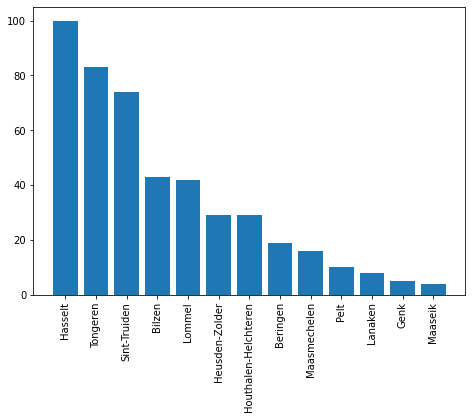

In [24]:
import matplotlib.pyplot as plt
plotVC = dat[["Suburb", "Venue Category"]]
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(plotVC['Suburb'],plotVC['Venue Category'])
plt.xticks(rotation=90)
plt.show()

#### Graph showing number of citizens over 64 per suburb

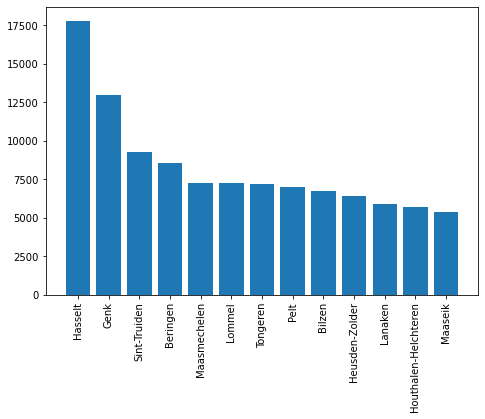

In [25]:
plotpop = dat[["Suburb", "Over 64"]]
plotpop = plotpop.sort_values("Over 64", ascending=False) 
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(plotpop['Suburb'],plotpop['Over 64'])
plt.xticks(rotation=90)
plt.show()

### Ranking for recommendation 

In [26]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
column_names_to_normalize = ['Venue Category', 'Over 64']
x = dat[column_names_to_normalize].values
x_scaled = min_max_scaler.fit_transform(x)
df_temp = pd.DataFrame(x_scaled, columns=column_names_to_normalize, index = dat.index)
dat[column_names_to_normalize] = df_temp

In [27]:
dat.head(13)

,Suburb,Suburb Latitude,Suburb Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Country,PostalCode,Region,RegionCode,Province,ProvinceCode,City,Occurrences,Latitude,Longitude,Over 64
3,Hasselt,100,100,100,100,100,1.000000,BE,3500,Vlaanderen,VLG,Limbourg,VLI,Hasselt,71,50.9311,5.3378,1.000000
12,Tongeren,83,83,83,83,83,0.822917,BE,3700,Vlaanderen,VLG,Limbourg,VLI,Tongeren,73,50.7805,5.4648,0.142708
11,Sint-Truiden,74,74,74,74,74,0.729167,BE,3800,Vlaanderen,VLG,Limbourg,VLI,Hasselt,71,50.8168,5.1865,0.312153
1,Bilzen,43,43,43,43,43,0.406250,BE,3740,Vlaanderen,VLG,Limbourg,VLI,Tongeren,73,50.8733,5.5184,0.107755
7,Lommel,42,42,42,42,42,0.395833,BE,3920,Vlaanderen,VLG,Limbourg,VLI,Maaseik,72,51.2307,5.3135,0.149392
4,Heusden-Zolder,29,29,29,29,29,0.260417,BE,3550,Vlaanderen,VLG,Limbourg,VLI,Hasselt,71,51.0373,5.2965,0.082709
5,Houthalen-Helchteren,29,29,29,29,29,0.260417,BE,3530,Vlaanderen,VLG,Limbourg,VLI,Maaseik,72,51.0322,5.3785,0.024321
0,Beringen,19,19,19,19,19,0.156250,BE,3580,Vlaanderen,VLG,Limbourg,VLI,Hasselt,71,51.0495,5.2261,0.253121
9,Maasmechelen,16,16,16,16,16,0.125000,BE,3630,Vlaanderen,VLG,Limbourg,VLI,Tongeren,73,50.9655,5.6945,0.149634
10,Pelt,10,10,10,10,10,0.062500,BE,3900,Vlaanderen,VLG,Limbourg,VLI,Maaseik,72,51.2104,5.4156,0.127889


In [28]:
dat['FinalRank'] = 0.6 * dat['Venue Category'] + 0.4 * dat['Over 64']  ##here the weights are 0.6 and 0.4. These can be adjusted
dat.head(5)

,Suburb,Suburb Latitude,Suburb Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Country,PostalCode,Region,RegionCode,Province,ProvinceCode,City,Occurrences,Latitude,Longitude,Over 64,FinalRank
3,Hasselt,100,100,100,100,100,1.000000,BE,3500,Vlaanderen,VLG,Limbourg,VLI,Hasselt,71,50.9311,5.3378,1.000000,1.000000
12,Tongeren,83,83,83,83,83,0.822917,BE,3700,Vlaanderen,VLG,Limbourg,VLI,Tongeren,73,50.7805,5.4648,0.142708,0.550833
11,Sint-Truiden,74,74,74,74,74,0.729167,BE,3800,Vlaanderen,VLG,Limbourg,VLI,Hasselt,71,50.8168,5.1865,0.312153,0.562361
1,Bilzen,43,43,43,43,43,0.406250,BE,3740,Vlaanderen,VLG,Limbourg,VLI,Tongeren,73,50.8733,5.5184,0.107755,0.286852
7,Lommel,42,42,42,42,42,0.395833,BE,3920,Vlaanderen,VLG,Limbourg,VLI,Maaseik,72,51.2307,5.3135,0.149392,0.297257


In [29]:
dat_final = dat.sort_values("FinalRank", ascending=False) 
dat_final.head(5)

,Suburb,Suburb Latitude,Suburb Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Country,PostalCode,Region,RegionCode,Province,ProvinceCode,City,Occurrences,Latitude,Longitude,Over 64,FinalRank
3,Hasselt,100,100,100,100,100,1.000000,BE,3500,Vlaanderen,VLG,Limbourg,VLI,Hasselt,71,50.9311,5.3378,1.000000,1.000000
11,Sint-Truiden,74,74,74,74,74,0.729167,BE,3800,Vlaanderen,VLG,Limbourg,VLI,Hasselt,71,50.8168,5.1865,0.312153,0.562361
12,Tongeren,83,83,83,83,83,0.822917,BE,3700,Vlaanderen,VLG,Limbourg,VLI,Tongeren,73,50.7805,5.4648,0.142708,0.550833
7,Lommel,42,42,42,42,42,0.395833,BE,3920,Vlaanderen,VLG,Limbourg,VLI,Maaseik,72,51.2307,5.3135,0.149392,0.297257
1,Bilzen,43,43,43,43,43,0.406250,BE,3740,Vlaanderen,VLG,Limbourg,VLI,Tongeren,73,50.8733,5.5184,0.107755,0.286852


The above table shows the recommendation for the top 5 suburbs to launch a "shopper" service in